## Importing required packages

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns

from scipy import  stats
from scipy.stats import kstest  # > 5000 records

from sklearn.preprocessing import StandardScaler

import statsmodels.formula.api as sm
import statsmodels.api as sm1 


from sklearn.metrics import silhouette_samples, silhouette_score

# Model building related packages

from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.stats import zscore

from scipy import stats

from sklearn.model_selection import GridSearchCV,KFold,train_test_split,cross_val_score
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.options.display.max_columns = 1000

In [3]:
df = pd.read_csv("Insurance_Marketing-Customer-Value-Analysis.csv")
df.columns = df.columns.str.replace(" ","_")
df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/2011,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/2011,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/2011,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/2011,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
df.sample(5)

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
3944,CX20455,Arizona,22103.507200,Yes,Basic,College,1/30/2011,Unemployed,M,0,Suburban,Married,102,35,48,0,2,Corporate Auto,Corporate L3,Offer1,Branch,489.600000,SUV,Medsize
8349,YX96463,Oregon,5926.980962,No,Basic,Bachelor,2/7/2011,Employed,F,58733,Suburban,Married,74,26,42,0,9,Corporate Auto,Corporate L2,Offer2,Call Center,355.200000,Four-Door Car,Small
5826,SG53084,California,4766.645359,No,Basic,Bachelor,2/28/2011,Employed,F,70432,Rural,Married,61,16,49,3,4,Personal Auto,Personal L2,Offer4,Web,6.422285,Four-Door Car,Medsize
842,OE19087,California,2243.473907,No,Basic,High School or Below,2/24/2011,Unemployed,F,0,Suburban,Single,62,26,18,0,1,Personal Auto,Personal L3,Offer4,Call Center,446.400000,Four-Door Car,Medsize
6100,PD22502,California,4799.621411,No,Basic,Bachelor,1/24/2011,Unemployed,F,0,Suburban,Married,65,11,25,0,4,Personal Auto,Personal L3,Offer1,Agent,312.000000,Two-Door Car,Small


In [5]:
df.columns

Index(['Customer', 'State', 'Customer_Lifetime_Value', 'Response', 'Coverage',
       'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location_Code', 'Marital_Status', 'Monthly_Premium_Auto',
       'Months_Since_Last_Claim', 'Months_Since_Policy_Inception',
       'Number_of_Open_Complaints', 'Number_of_Policies', 'Policy_Type',
       'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Total_Claim_Amount',
       'Vehicle_Class', 'Vehicle_Size'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer_Lifetime_Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly_Premium_Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months_Since_Last_Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months_Since_Policy_Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number_of_Open_Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number_of_Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total_Claim_Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678


In [7]:
df1 = df.copy()

In [8]:
df1.isnull().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

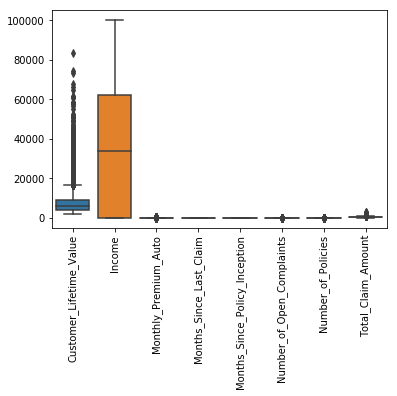

In [9]:
plt.xticks(rotation=90)
sns.boxplot(data=df)

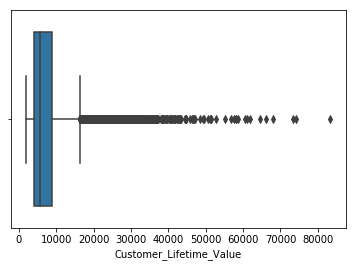

In [10]:
sns.boxplot(df.Customer_Lifetime_Value)

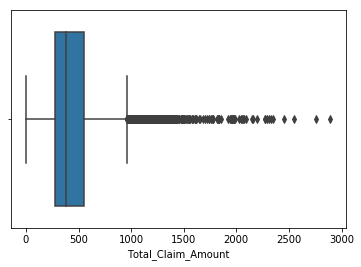

In [11]:
sns.boxplot(df.Total_Claim_Amount)

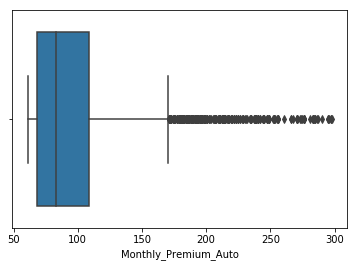

In [12]:
sns.boxplot(df.Monthly_Premium_Auto)

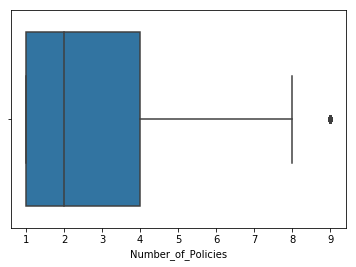

In [13]:
sns.boxplot(df.Number_of_Policies)

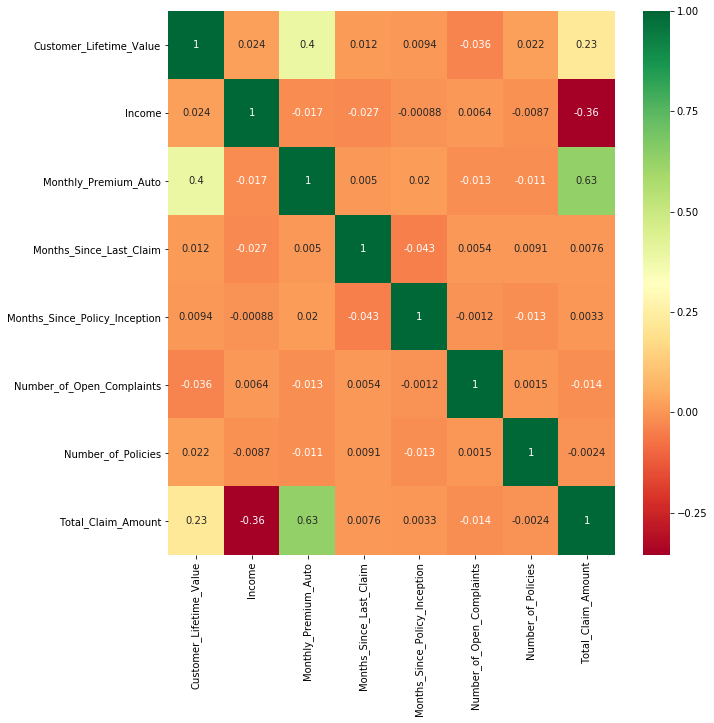

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')
plt.show()

##### The highly correlared variables with Customer Lifetime Value are Income and Total Claim Amount

In [15]:
df1.drop(["Effective_To_Date","Customer"],1,inplace=True)

In [16]:
df1.dtypes

State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

In [17]:
df2 = df1.copy()

In [18]:
df2.head()

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,Washington,2763.519279,No,Basic,Bachelor,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,Arizona,6979.535903,No,Extended,Bachelor,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,Nevada,12887.431650,No,Premium,Bachelor,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,California,7645.861827,No,Basic,Bachelor,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,Washington,2813.692575,No,Basic,Bachelor,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [19]:
cont_cols = list(df1.select_dtypes(exclude="object"))
cat_cols = list(df1.select_dtypes(include="object"))

In [20]:
# Dictionary creation (Only for real time training data not for test data)

# We can use the output as a code to perform custom encoding

for i in cat_cols:
    a = df2[i].value_counts().index
    k=0
    exec(f"cat_{i}={dict()}")
    for j in a:
        exec(f"cat_{i}[j]={k}")
        k=k+1
    exec(f"hi=cat_{i}")

    print(f"df2['{i}'] = df2['{i}'].map({hi})")
    

df2['State'] = df2['State'].map({'California': 0, 'Oregon': 1, 'Arizona': 2, 'Nevada': 3, 'Washington': 4})
df2['Response'] = df2['Response'].map({'No': 0, 'Yes': 1})
df2['Coverage'] = df2['Coverage'].map({'Basic': 0, 'Extended': 1, 'Premium': 2})
df2['Education'] = df2['Education'].map({'Bachelor': 0, 'College': 1, 'High School or Below': 2, 'Master': 3, 'Doctor': 4})
df2['EmploymentStatus'] = df2['EmploymentStatus'].map({'Employed': 0, 'Unemployed': 1, 'Medical Leave': 2, 'Disabled': 3, 'Retired': 4})
df2['Gender'] = df2['Gender'].map({'F': 0, 'M': 1})
df2['Location_Code'] = df2['Location_Code'].map({'Suburban': 0, 'Rural': 1, 'Urban': 2})
df2['Marital_Status'] = df2['Marital_Status'].map({'Married': 0, 'Single': 1, 'Divorced': 2})
df2['Policy_Type'] = df2['Policy_Type'].map({'Personal Auto': 0, 'Corporate Auto': 1, 'Special Auto': 2})
df2['Policy'] = df2['Policy'].map({'Personal L3': 0, 'Personal L2': 1, 'Personal L1': 2, 'Corporate L3': 3, 'Corporate L2': 4, 'Corporate L1': 5, 'Spe

In [21]:
df2['State'] = df2['State'].map({'California': 0, 'Oregon': 1, 'Arizona': 2, 'Nevada': 3, 'Washington': 4})
df2['Response'] = df2['Response'].map({'No': 0, 'Yes': 1})
df2['Coverage'] = df2['Coverage'].map({'Basic': 0, 'Extended': 1, 'Premium': 2})
df2['Education'] = df2['Education'].map({'Bachelor': 0, 'College': 1, 'High School or Below': 2, 'Master': 3, 'Doctor': 4})
df2['EmploymentStatus'] = df2['EmploymentStatus'].map({'Employed': 0, 'Unemployed': 1, 'Medical Leave': 2, 'Disabled': 3, 'Retired': 4})
df2['Gender'] = df2['Gender'].map({'F': 0, 'M': 1})
df2['Location_Code'] = df2['Location_Code'].map({'Suburban': 0, 'Rural': 1, 'Urban': 2})
df2['Marital_Status'] = df2['Marital_Status'].map({'Married': 0, 'Single': 1, 'Divorced': 2})
df2['Policy_Type'] = df2['Policy_Type'].map({'Personal Auto': 0, 'Corporate Auto': 1, 'Special Auto': 2})
df2['Policy'] = df2['Policy'].map({'Personal L3': 0, 'Personal L2': 1, 'Personal L1': 2, 'Corporate L3': 3, 'Corporate L2': 4, 'Corporate L1': 5, 'Special L2': 6, 'Special L3': 7, 'Special L1': 8})
df2['Renew_Offer_Type'] = df2['Renew_Offer_Type'].map({'Offer1': 0, 'Offer2': 1, 'Offer3': 2, 'Offer4': 3})
df2['Sales_Channel'] = df2['Sales_Channel'].map({'Agent': 0, 'Branch': 1, 'Call Center': 2, 'Web': 3})
df2['Vehicle_Class'] = df2['Vehicle_Class'].map({'Four-Door Car': 0, 'Two-Door Car': 1, 'SUV': 2, 'Sports Car': 3, 'Luxury SUV': 4, 'Luxury Car': 5})
df2['Vehicle_Size'] = df2['Vehicle_Size'].map({'Medsize': 0, 'Small': 1, 'Large': 2})

### We can create bins for the Customer_Lifetime_Value column to better understanding of the data through visualization. To find the number of clusters approximately, we are performing Average Silhouette method.

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.6338180055014125


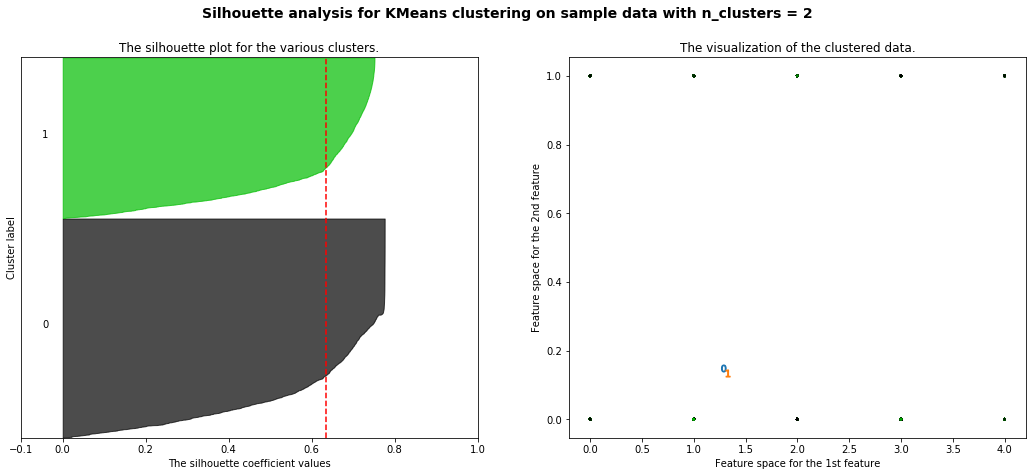

For n_clusters = 3 The average silhouette_score is : 0.641834568147959


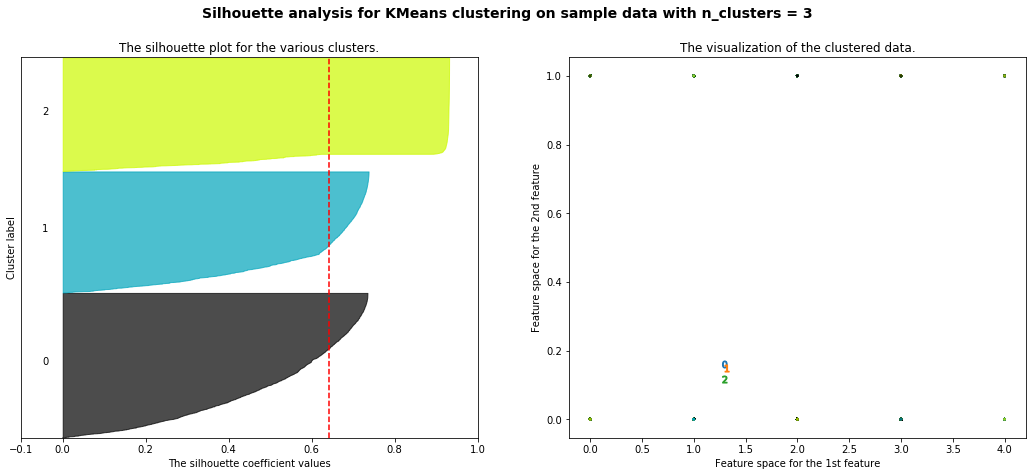

For n_clusters = 4 The average silhouette_score is : 0.6562074661529037


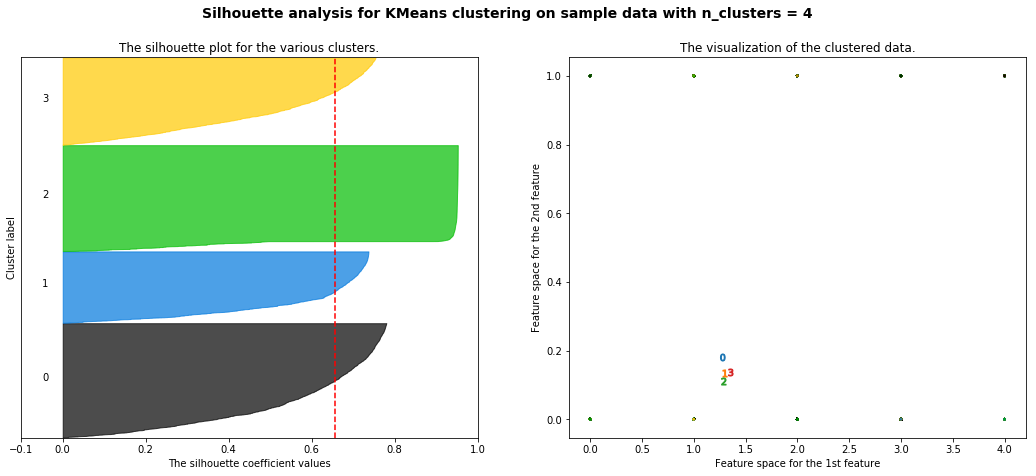

For n_clusters = 5 The average silhouette_score is : 0.6554606225841151


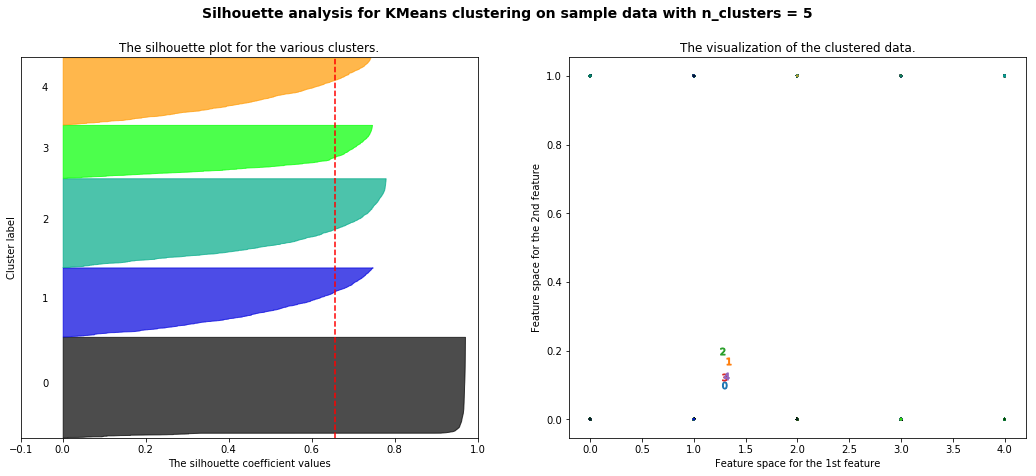

For n_clusters = 6 The average silhouette_score is : 0.6573319862460203


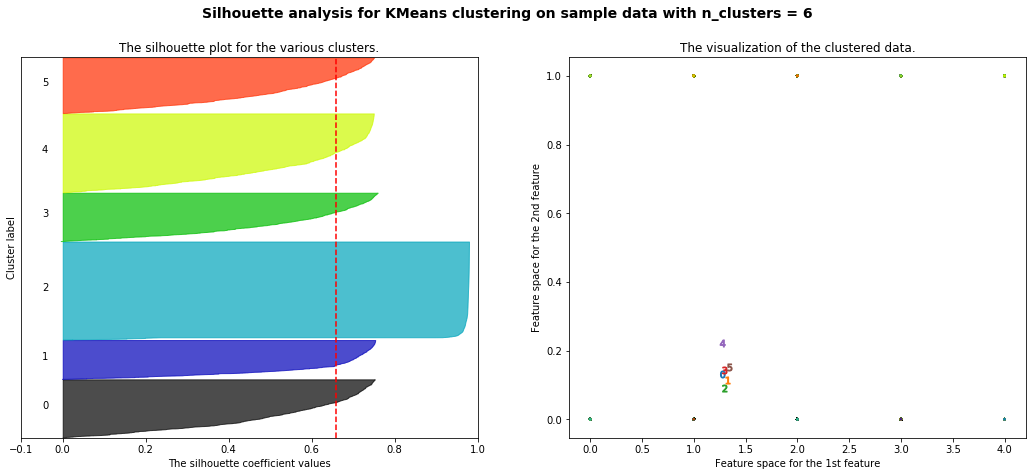

For n_clusters = 7 The average silhouette_score is : 0.643142980217249


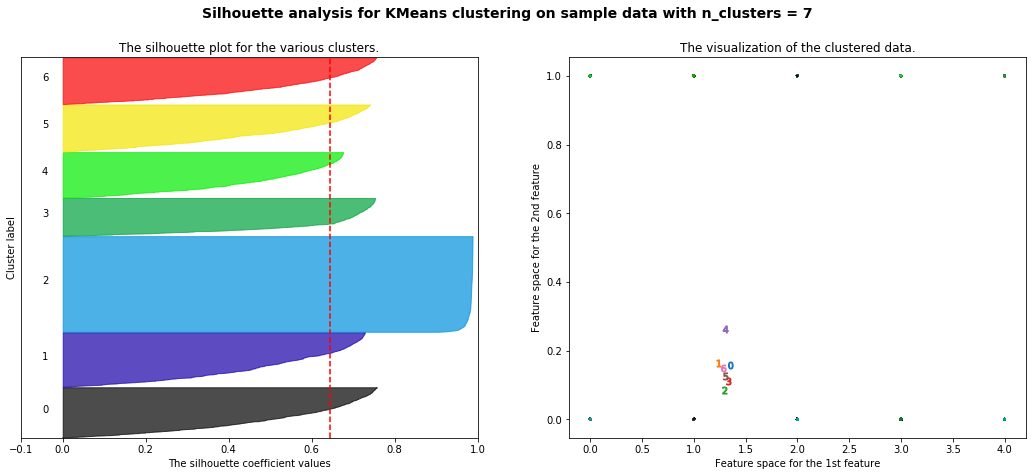

For n_clusters = 8 The average silhouette_score is : 0.6417252051918042


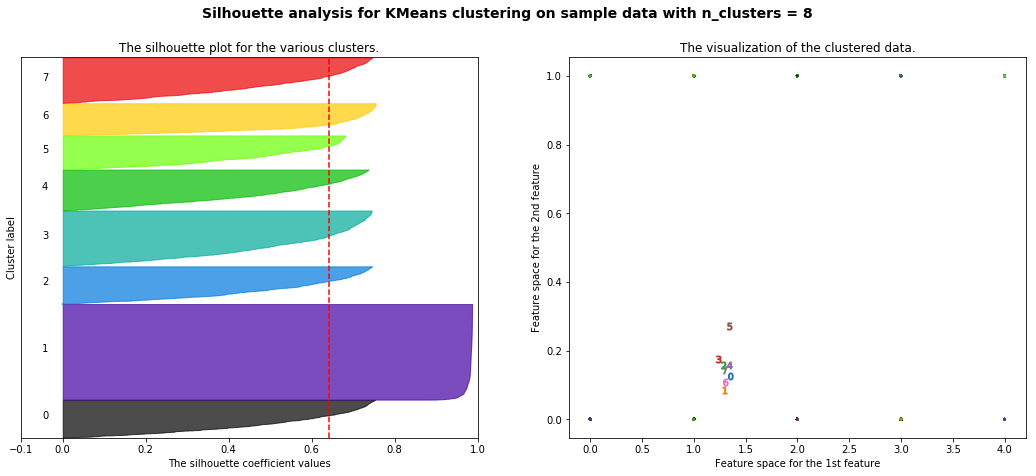

For n_clusters = 9 The average silhouette_score is : 0.6438590989010717


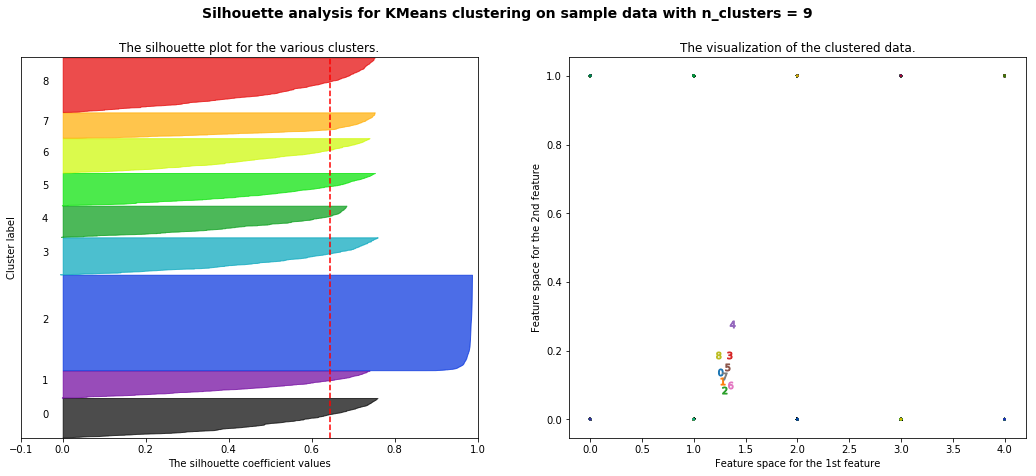

In [22]:
X = df2.drop('Customer_Lifetime_Value',axis=1)
Y = df2['Customer_Lifetime_Value']

from __future__ import print_function

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

range_n_clusters = [2,3,4,5,6,7,8,9]

score_cluster = []

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)
    
    score_cluster.append((silhouette_avg,n_clusters))

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):

        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

      
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

       
        y_lower = y_upper + 10 

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")


    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])


    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)


    centers = clusterer.cluster_centers_
  
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [23]:
score_cluster.sort(reverse=True)
score_cluster

[(0.6573319862460203, 6),
 (0.6562074661529037, 4),
 (0.6554606225841151, 5),
 (0.6438590989010717, 9),
 (0.643142980217249, 7),
 (0.641834568147959, 3),
 (0.6417252051918042, 8),
 (0.6338180055014125, 2)]

In [24]:
scores = [i for (i,j) in score_cluster]
clusters = [j for (i,j) in score_cluster]

In [25]:
silhouette = pd.DataFrame()

In [26]:
silhouette['Average_Silhouette_Score'] = scores
silhouette['Number_of_Clusters'] = clusters

In [27]:
silhouette

,Average_Silhouette_Score,Number_of_Clusters
0,0.657332,6
1,0.656207,4
2,0.655461,5
3,0.643859,9
4,0.643143,7
5,0.641835,3
6,0.641725,8
7,0.633818,2


#### So, the Bins can be fixed as 6 and we will devide the data to 6 bins.

In [28]:
(df2.Customer_Lifetime_Value.max()-df2.Customer_Lifetime_Value.min())/6

13571.228919166666

In [29]:
df1["CLV_Band"] = df1["Customer_Lifetime_Value"]

In [30]:
df1["CLV_Band"] = np.where((df1["Customer_Lifetime_Value"]>0) & (df1["Customer_Lifetime_Value"]<13570),"Band_1",df1["CLV_Band"])
df1["CLV_Band"] = np.where((df1["Customer_Lifetime_Value"]>=13570) & (df1["Customer_Lifetime_Value"]<27140),"Band_2",df1["CLV_Band"])
df1["CLV_Band"] = np.where((df1["Customer_Lifetime_Value"]>=27140) & (df1["Customer_Lifetime_Value"]<40710),"Band_3",df1["CLV_Band"])
df1["CLV_Band"] = np.where((df1["Customer_Lifetime_Value"]>=40710) & (df1["Customer_Lifetime_Value"]<54280),"Band_4",df1["CLV_Band"])
df1["CLV_Band"] = np.where((df1["Customer_Lifetime_Value"]>=54280) & (df1["Customer_Lifetime_Value"]<67850),"Band_5",df1["CLV_Band"])
df1["CLV_Band"] = np.where((df1["Customer_Lifetime_Value"]>=67850) ,"Band_6",df1["CLV_Band"])

In [31]:
df1.CLV_Band.unique()

array(['Band_1', 'Band_2', 'Band_3', 'Band_5', 'Band_4', 'Band_6'],
      dtype=object)

##### EXPLORATORY DATA ANALYSIS

In [32]:
df1.describe(include='all')

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,CLV_Band
count,9134,9134.000000,9134,9134,9134,9134,9134,9134.000000,9134,9134,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134,9134,9134,9134,9134.000000,9134,9134,9134
unique,5,NaN,2,3,5,5,2,NaN,3,3,NaN,NaN,NaN,NaN,NaN,3,9,4,4,NaN,6,3,6
top,California,NaN,No,Basic,Bachelor,Employed,F,NaN,Suburban,Married,NaN,NaN,NaN,NaN,NaN,Personal Auto,Personal L3,Offer1,Agent,NaN,Four-Door Car,Medsize,Band_1
freq,3150,NaN,7826,5568,2748,5698,4658,NaN,5779,5298,NaN,NaN,NaN,NaN,NaN,6788,3426,3752,3477,NaN,4621,6424,7965
mean,NaN,8004.940475,NaN,NaN,NaN,NaN,NaN,37657.380009,NaN,NaN,93.219291,15.097000,48.064594,0.384388,2.966170,NaN,NaN,NaN,NaN,434.088794,NaN,NaN,NaN
std,NaN,6870.967608,NaN,NaN,NaN,NaN,NaN,30379.904734,NaN,NaN,34.407967,10.073257,27.905991,0.910384,2.390182,NaN,NaN,NaN,NaN,290.500092,NaN,NaN,NaN
min,NaN,1898.007675,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,61.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,0.099007,NaN,NaN,NaN
25%,NaN,3994.251794,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,68.000000,6.000000,24.000000,0.000000,1.000000,NaN,NaN,NaN,NaN,272.258244,NaN,NaN,NaN
50%,NaN,5780.182197,NaN,NaN,NaN,NaN,NaN,33889.500000,NaN,NaN,83.000000,14.000000,48.000000,0.000000,2.000000,NaN,NaN,NaN,NaN,383.945434,NaN,NaN,NaN
75%,NaN,8962.167041,NaN,NaN,NaN,NaN,NaN,62320.000000,NaN,NaN,109.000000,23.000000,71.000000,0.000000,4.000000,NaN,NaN,NaN,NaN,547.514839,NaN,NaN,NaN


In [33]:
df.skew().sort_values(ascending=False)

Customer_Lifetime_Value          3.032280
Number_of_Open_Complaints        2.783263
Monthly_Premium_Auto             2.123546
Total_Claim_Amount               1.714966
Number_of_Policies               1.253333
Income                           0.286887
Months_Since_Last_Claim          0.278586
Months_Since_Policy_Inception    0.040165
dtype: float64

##### Customer Lifetime Value, Number of open complaints, Monthly Premium Auto - These features are right-skewed

In [34]:
df.kurtosis().sort_values(ascending=False)

Customer_Lifetime_Value          13.823533
Number_of_Open_Complaints         7.749308
Monthly_Premium_Auto              6.193605
Total_Claim_Amount                5.979401
Number_of_Policies                0.363157
Months_Since_Last_Claim          -1.073668
Income                           -1.094326
Months_Since_Policy_Inception    -1.133046
dtype: float64

#### Customer Lifetime Values, Number of Open Complaints, Monthly Premium Auto, Total Claim Amount - These features tend to show Kurtosis

In [35]:
def annot_plot1(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
         ax.annotate(f"{p.get_height() * 100 / df.shape[0]:.2f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
         ha='center', va='center', fontsize=11, color='black', rotation=45,xytext=(0,22),
         textcoords='offset points')
            
def annot_plot(ax,w,h):
    annot_plot1(ax,w,h)
    ax.legend(loc='upper right',fontsize='x-large')

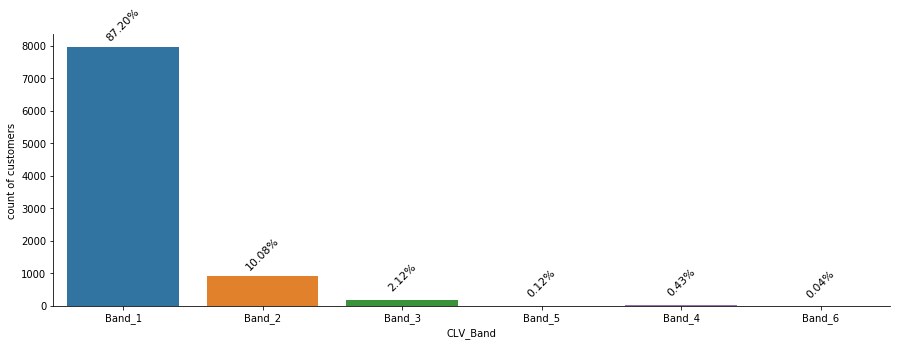

In [36]:
plt.figure(figsize=(15,5))
ax = sns.countplot('CLV_Band',data = df1)
plt.ylabel('count of customers')
annot_plot1(ax, 0.08,1)
plt.show()

#### The graph shows that around 87% of the customer's CLV comes under Band 1

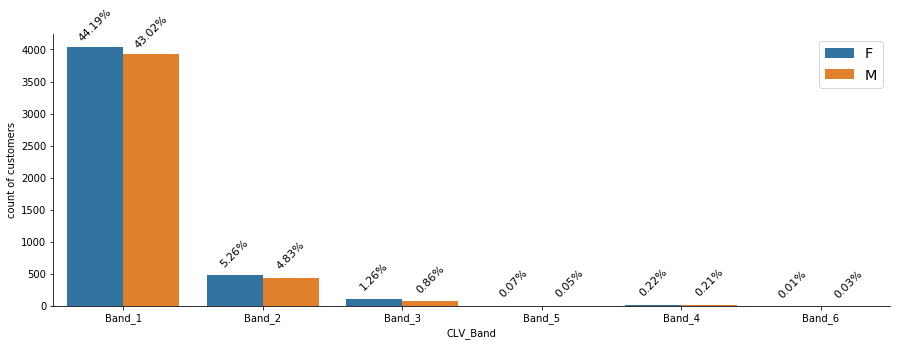

In [37]:
plt.figure(figsize=(15,5))
ax = sns.countplot('CLV_Band',hue = 'Gender' ,data = df1)
plt.ylabel('count of customers')
annot_plot(ax, 0.08,1)
plt.show()

#### Ratio of male and female customers in Band 1 is almost the same

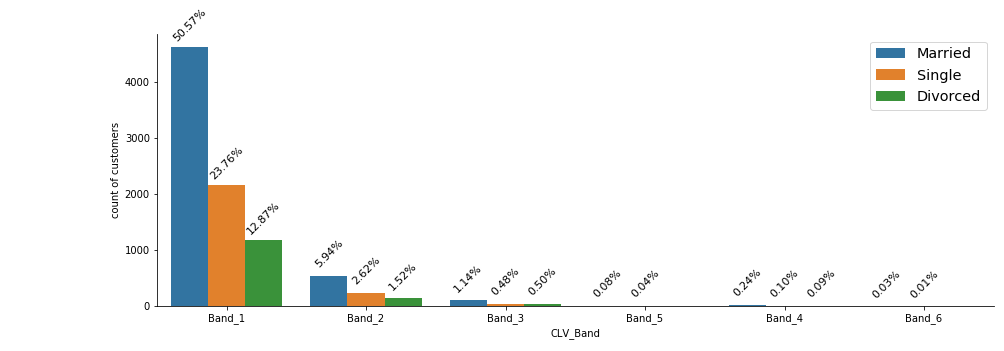

In [38]:
#renew offer
plt.figure(figsize=(15,5))
ax = sns.countplot('CLV_Band', hue = 'Marital_Status', data = df1)
plt.ylabel('count of customers')
annot_plot(ax,0.08,1)
plt.show()


#### There are more than 50% of the customers who are married comes under Band 1

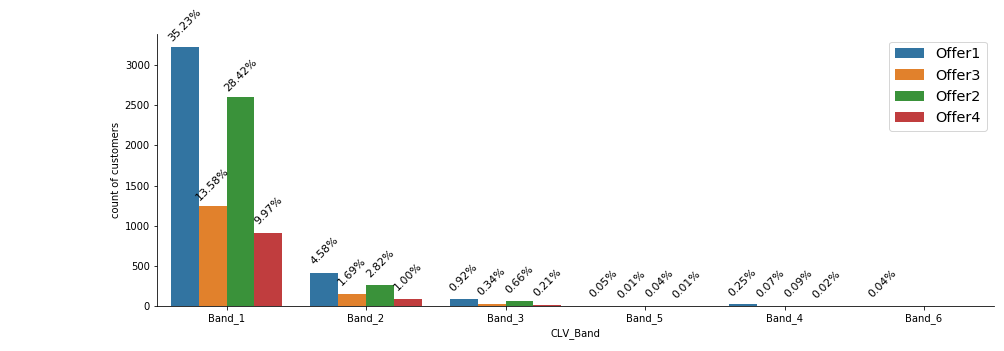

In [39]:
plt.figure(figsize=(15,5))
ax = sns.countplot('CLV_Band',hue = 'Renew_Offer_Type' ,data = df1)
plt.ylabel('count of customers')
annot_plot(ax, 0.08,1)
plt.show()

#### More number of customers prefer offer 1 as renew offer in all the bands

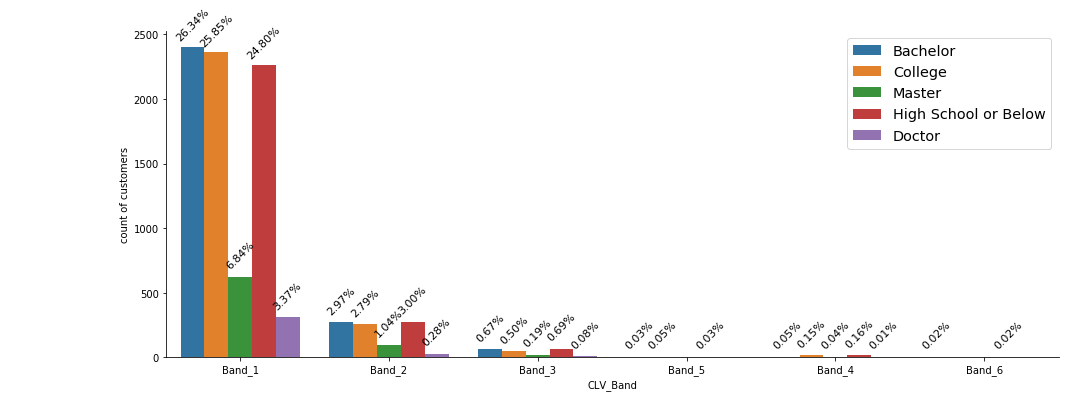

In [40]:
#education

plt.figure(figsize=(16,6))
ax = sns.countplot('CLV_Band',hue = 'Education' ,data = df1)
plt.ylabel('count of customers')
annot_plot(ax, 0.08,1)
plt.show()

#### Around 75% of the total customers falls under Bachelor, College and High School or Below in Band 1 itself

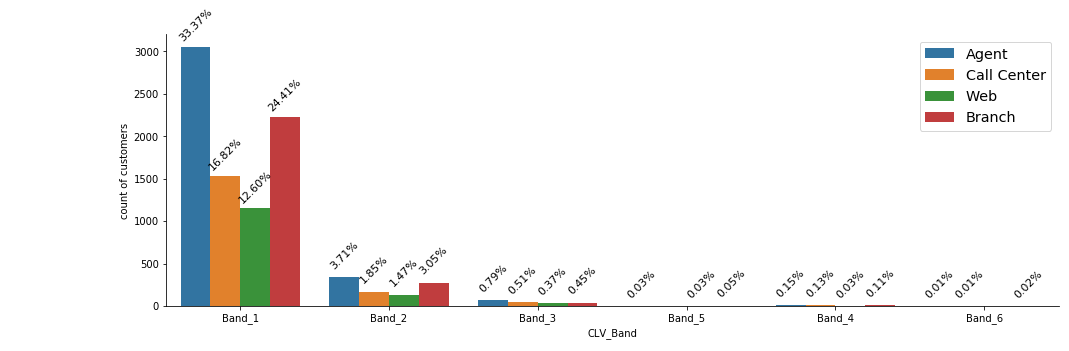

In [41]:
# Sales Channal

plt.figure(figsize=(16,5))
ax = sns.countplot('CLV_Band',hue = 'Sales_Channel' ,data = df1)
plt.ylabel('count of customers')
annot_plot(ax, 0.08,1)
plt.show()

#### More than one-third of total customers comes through agent in band 1

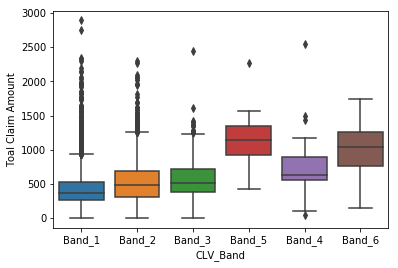

In [42]:
sns.boxplot(y = 'Total_Claim_Amount' , x = 'CLV_Band', data = df1)
plt.ylabel('Toal Claim Amount')
plt.show()

#### Multivariate analysis showing the range of each band with respect to total claim amount

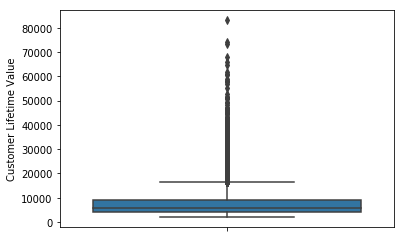

In [43]:
sns.boxplot(y = 'Customer_Lifetime_Value' , data = df1)
plt.ylabel('Customer Lifetime Value')
plt.show()

#### Univariate analysis showing outliers present in the target variable. We cannot treat these outliers in this dataset

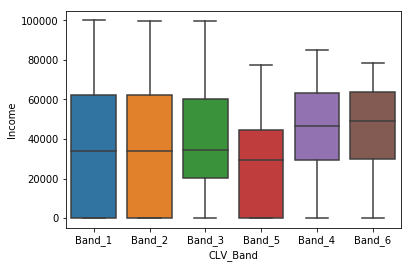

In [44]:
sns.boxplot(y = 'Income' , x = 'CLV_Band', data = df1)
plt.show()

#### Band 1, Band 2, Band 3 almost have the same range

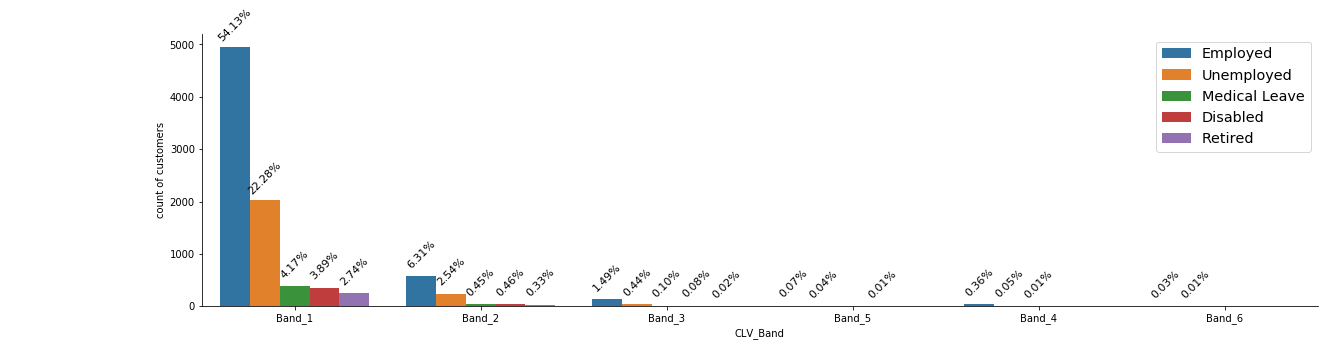

In [45]:
#Response rate by EmploymentStatus

plt.figure(figsize=(20,5))
ax = sns.countplot('CLV_Band',hue = 'EmploymentStatus' ,data = df1)
plt.ylabel('count of customers')
annot_plot(ax, 0.08,1)
plt.show()

#### Employed customers are more in number in all the bands and high percentage of customers falls under band 1

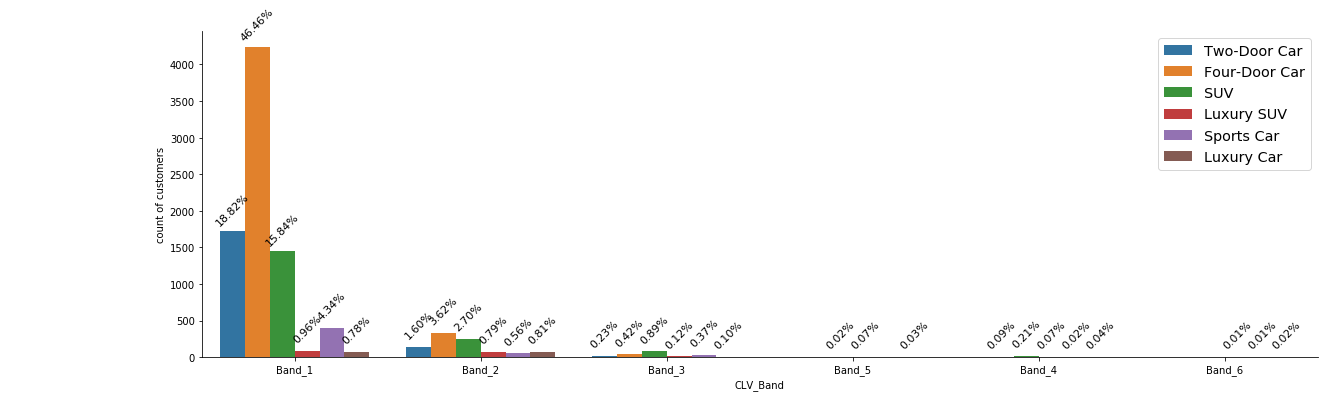

In [46]:
#Response rate by Vehicle Class:

plt.figure(figsize=(20,6))
ax = sns.countplot('CLV_Band',hue = 'Vehicle_Class' ,data = df1)
plt.ylabel('count of customers')
annot_plot(ax, 0.08,1)
plt.show()

#### More number of customers have four door cars in all the bands

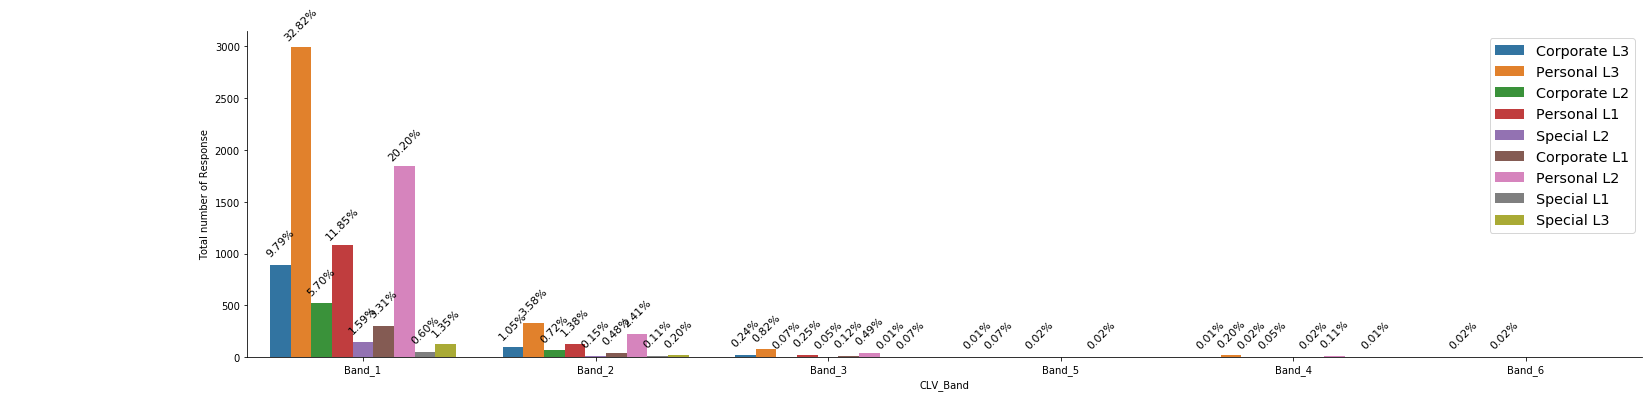

In [47]:
#Response rate by Policy:

plt.figure(figsize=(25,6))
ax = sns.countplot('CLV_Band',hue = 'Policy' ,data = df1)
plt.ylabel('Total number of Response')
annot_plot(ax, 0.08,1)
plt.show()

#### More number of customers prefer Personal L3 type policy

In [48]:
df1.dtypes

State                             object
Customer_Lifetime_Value          float64
Response                          object
Coverage                          object
Education                         object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
CLV_Band                          object
dtype: object

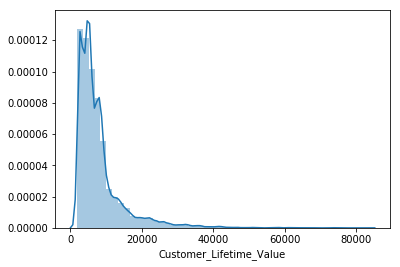

In [49]:
sns.distplot(df1.Customer_Lifetime_Value)

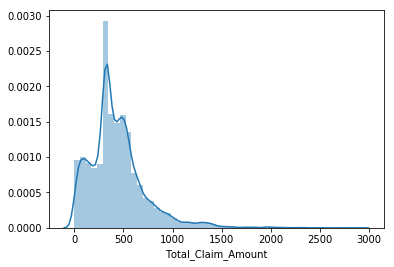

In [50]:
sns.distplot(df1.Total_Claim_Amount)

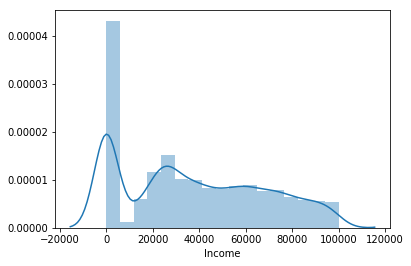

In [51]:
sns.distplot(df1.Income)

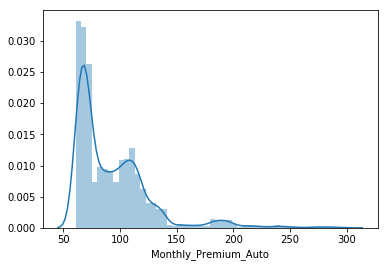

In [52]:
sns.distplot(df1.Monthly_Premium_Auto)

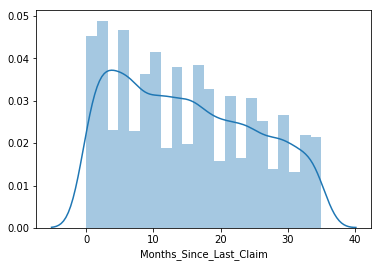

In [53]:
sns.distplot(df1.Months_Since_Last_Claim)

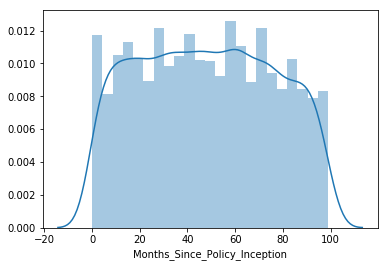

In [54]:
sns.distplot(df1.Months_Since_Policy_Inception)

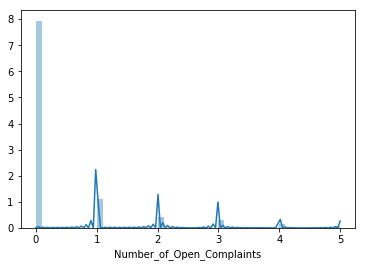

In [55]:
sns.distplot(df1.Number_of_Open_Complaints)

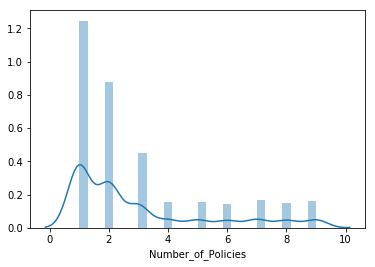

In [56]:
sns.distplot(df1.Number_of_Policies)

In [57]:
df2["CLV_Band"] = df2["Customer_Lifetime_Value"]

df2["CLV_Band"] = np.where((df2["Customer_Lifetime_Value"]>0) & (df2["Customer_Lifetime_Value"]<13570),"Band_1",df2["CLV_Band"])
df2["CLV_Band"] = np.where((df2["Customer_Lifetime_Value"]>=13570) & (df2["Customer_Lifetime_Value"]<27140),"Band_2",df2["CLV_Band"])
df2["CLV_Band"] = np.where((df2["Customer_Lifetime_Value"]>=27140) & (df2["Customer_Lifetime_Value"]<40710),"Band_3",df2["CLV_Band"])
df2["CLV_Band"] = np.where((df2["Customer_Lifetime_Value"]>=40710) & (df2["Customer_Lifetime_Value"]<54280),"Band_4",df2["CLV_Band"])
df2["CLV_Band"] = np.where((df2["Customer_Lifetime_Value"]>=54280) & (df2["Customer_Lifetime_Value"]<67850),"Band_5",df2["CLV_Band"])
df2["CLV_Band"] = np.where((df2["Customer_Lifetime_Value"]>=67850) ,"Band_6",df2["CLV_Band"])

In [58]:
df2['CLV_Band'] = df2['CLV_Band'].map({'Band_1': 0, 'Band_2': 1, 'Band_3': 2, 'Band_4': 3, 'Band_5': 4, 'Band_6':5})

In [59]:
# Check normality for all the columns

kolmo=[]

for i in cont_cols:
    kolmo.append(((kstest(df[i],"norm")[1]),i))

not_normal = []
normal = []
for j in kolmo:    
    if j[0]<0.05:
        not_normal.append(j[1])
    else:
        normal.append(j[1])
print(normal)
print(not_normal)
# All features are not normally distributed

[]
['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount']


In [60]:
# Standard Scaling continuous variables

scl = StandardScaler()

df2[cont_cols] = scl.fit_transform(df2[cont_cols])
df2.head()

,State,Customer_Lifetime_Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,CLV_Band
0,4,-0.762878,0,0,0,0,0,0.612827,0,0,-0.703925,1.678099,-1.543287,-0.42225,-0.822648,1,3,0,0,-0.169640,1,0,0
1,2,-0.149245,0,1,0,1,0,-1.239617,0,1,0.022691,-0.208186,-0.217334,-0.42225,2.106160,0,0,2,0,2.400737,0,0,0
2,3,0.710636,0,2,0,0,0,0.365710,0,0,0.429596,0.288205,-0.360680,-0.42225,-0.404247,0,0,0,0,0.455734,1,0,0
3,0,-0.052263,0,0,0,1,1,-1.239617,0,0,0.371467,0.288205,0.606907,-0.42225,1.687759,1,4,0,2,0.329769,2,0,0
4,4,-0.755575,0,0,0,0,1,0.203390,1,1,-0.587666,-0.307465,-0.145661,-0.42225,-0.822648,0,2,0,0,-1.018843,0,0,0


In [61]:
df2['Customer_Lifetime_Value'].skew() # Skewness of the target variable

3.0322802599299847

In [62]:
"+".join(df2.columns)

'State+Customer_Lifetime_Value+Response+Coverage+Education+EmploymentStatus+Gender+Income+Location_Code+Marital_Status+Monthly_Premium_Auto+Months_Since_Last_Claim+Months_Since_Policy_Inception+Number_of_Open_Complaints+Number_of_Policies+Policy_Type+Policy+Renew_Offer_Type+Sales_Channel+Total_Claim_Amount+Vehicle_Class+Vehicle_Size+CLV_Band'

In [63]:
# Base Model - Linear Regression

model1= sm.ols("Customer_Lifetime_Value~State+Response+Coverage+Education+EmploymentStatus+Gender+Income+Location_Code+Marital_Status+Monthly_Premium_Auto+Months_Since_Last_Claim+Months_Since_Policy_Inception+Number_of_Open_Complaints+Number_of_Policies+Policy_Type+Policy+Renew_Offer_Type+Sales_Channel+Total_Claim_Amount+Vehicle_Class+Vehicle_Size",df2).fit()

In [64]:
# Base model results

model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.164
Model:                                 OLS   Adj. R-squared:                  0.162
Method:                      Least Squares   F-statistic:                     85.05
Date:                     Thu, 26 Sep 2019   Prob (F-statistic):               0.00
Time:                             14:50:54   Log-Likelihood:                -12143.
No. Observations:                     9134   AIC:                         2.433e+04
Df Residuals:                         9112   BIC:                         2.449e+04
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0102      0.039      0.259      0.795      -0.067       0.087
State                             0.0019      0.008      0.252      0.801      -0.013       0.017
Response                         -0.0511      0.029     -1.780      0.075      -0.107       0.005
Coverage                          0.0007      0.022      0.032      0.974      -0.042       0.043
Education                         0.0101      0.009      1.142      0.253      -0.007       0.027
EmploymentStatus                 -0.0161      0.012     -1.363      0.173      -0.039       0.007
Gender                           -0.0243      0.019     -1.257      0.209      -0.062       0.014
Income                            0.0205      0.012      1.642      0.101      -0.004       0.045
Location_Code                     0.0099      0.015      0.648      0.517      -0.020       0.040
Marital_Status                    0.0047      0.013      0.350      0.726      -0.021       0.031
Monthly_Premium_Auto              0.3703      0.025     14.567      0.000       0.320       0.420
Months_Since_Last_Claim           0.0095      0.010      0.987      0.324      -0.009       0.028
Months_Since_Policy_Inception    -0.0027      0.010     -0.275      0.783      -0.022       0.016
Number_of_Open_Complaints        -0.0331      0.010     -3.449      0.001      -0.052      -0.014
Number_of_Policies                0.0219      0.010      2.269      0.023       0.003       0.041
Policy_Type                      -0.0280      0.042     -0.670      0.503      -0.110       0.054
Policy                            0.0107      0.013      0.854      0.393      -0.014       0.035
Renew_Offer_Type                 -0.0498      0.010     -4.958      0.000      -0.070      -0.030
Sales_Channel                     0.0040      0.009      0.438      0.662      -0.014       0.022
Total_Claim_Amount               -0.0195      0.015     -1.284      0.199      -0.049       0.010
Vehicle_Class                     0.0378      0.018      2.129      0.033       0.003       0.073
Vehicle_Size                     -0.0111      0.014     -0.770      0.441      -0.039       0.017
==============================================================================
Omnibus:                     5666.088   Durbin-Watson:                   1.996
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            64596.069
Skew:                           2.852   Prob(JB):                         0.00
Kurtosis:                      14.713   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"

In [65]:
# VIF Test - To check for multicollinearity - 

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame({"Feature_name":list(df2.columns),
                    "VIF_Value":[variance_inflation_factor(df2.values, col) 
                                 for col in range(0, df2.shape[1])]})

vif.sort_values(by="VIF_Value")

,Feature_name,VIF_Value
13,Number_of_Open_Complaints,1.004134
11,Months_Since_Last_Claim,1.006294
12,Months_Since_Policy_Inception,1.012817
14,Number_of_Policies,1.078410
2,Response,1.273530
21,Vehicle_Size,1.342549
9,Marital_Status,1.600724
7,Income,1.702195
6,Gender,1.890615
0,State,1.932642


#### Monthly Premium Auto, Vehicle Class, CLV, CLV_Band, Policy Type and Policy have VIF values greater than 5. But we arae not dropping them as of now, since they hold less p - value

In [66]:
# Split X and Y - Dropping both CLV and CLV Band

X = df2.drop(['Customer_Lifetime_Value','CLV_Band'],axis=1)
Y = df2['Customer_Lifetime_Value']

In [67]:
#Creating train test split

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size = 0.3, random_state=0)

In [68]:
# OLS Model

x_train_sm = x_train
x_train_sm = sm1.add_constant(x_train_sm)

lin_OLS = sm1.OLS(y_train, x_train_sm).fit() 

In [69]:
# OLS Summary

lin_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.176
Model:                                 OLS   Adj. R-squared:                  0.173
Method:                      Least Squares   F-statistic:                     64.69
Date:                     Thu, 26 Sep 2019   Prob (F-statistic):          4.61e-248
Time:                             14:51:06   Log-Likelihood:                -8554.9
No. Observations:                     6393   AIC:                         1.715e+04
Df Residuals:                         6371   BIC:                         1.730e+04
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const                             0.0159      0.047      0.335      0.737      -0.077       0.109
State                            -0.0049      0.009     -0.538      0.591      -0.023       0.013
Response                         -0.0890      0.035     -2.529      0.011      -0.158      -0.020
Coverage                         -0.0023      0.026     -0.087      0.931      -0.054       0.049
Education                         0.0013      0.011      0.127      0.899      -0.019       0.022
EmploymentStatus                 -0.0057      0.014     -0.404      0.686      -0.034       0.022
Gender                           -0.0149      0.023     -0.640      0.522      -0.061       0.031
Income                            0.0189      0.015      1.255      0.210      -0.011       0.048
Location_Code                     0.0317      0.018      1.718      0.086      -0.004       0.068
Marital_Status                   -0.0174      0.016     -1.079      0.281      -0.049       0.014
Monthly_Premium_Auto              0.3644      0.031     11.833      0.000       0.304       0.425
Months_Since_Last_Claim           0.0067      0.012      0.574      0.566      -0.016       0.029
Months_Since_Policy_Inception    -0.0033      0.012     -0.285      0.776      -0.026       0.020
Number_of_Open_Complaints        -0.0312      0.011     -2.719      0.007      -0.054      -0.009
Number_of_Policies                0.0175      0.012      1.505      0.132      -0.005       0.040
Policy_Type                      -0.0227      0.050     -0.451      0.652      -0.122       0.076
Policy                            0.0093      0.015      0.617      0.537      -0.020       0.039
Renew_Offer_Type                 -0.0398      0.012     -3.278      0.001      -0.064      -0.016
Sales_Channel                    -0.0037      0.011     -0.335      0.737      -0.025       0.018
Total_Claim_Amount                0.0016      0.018      0.087      0.931      -0.035       0.038
Vehicle_Class                     0.0527      0.022      2.447      0.014       0.010       0.095
Vehicle_Size                     -0.0031      0.017     -0.175      0.861      -0.037       0.031
==============================================================================
Omnibus:                     4013.051   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            48362.362
Skew:                           2.867   Prob(JB):                         0.00
Kurtosis:                      15.194   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"

In [70]:
# Linearity Test

sm1.stats.diagnostic.linear_rainbow(lin_OLS, frac=0.7)

(1.1265115838487207, 0.0009266363963937935)

##### p-value < 0.05, Linearity test is passed

In [71]:
# Heteroscedasticy Test

from statsmodels.stats.api import het_goldfeldquandt
het_goldfeldquandt(Y, X)

(1.235363280942115, 5.453954546485031e-13, 'increasing')

##### There is a presence of Heteroscedasticity

#### The base model has passed 3 of the 5 Linear Assumptions tests, No Autocorrelation, No Multicollinearity, Linearity.
#### Failed remaining 2 tests, No normality and presence of heteroscedasticity

In [72]:
# RFE

from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
from sklearn.feature_selection import RFE
rfe = RFE(linreg, 9)  
rfe = rfe.fit(X,Y)
print(rfe.support_) 
print(rfe.ranking_)

[False  True False False False  True  True False False  True False False
  True  True False False  True False  True  True False]
[12  1 13  6  2  1  1  7  9  1  8 11  1  1  4  5  1 10  1  1  3]


In [73]:
rfe_rank = list(zip(rfe.ranking_,df2.columns,rfe.support_))

In [74]:
rfe_rank.sort(reverse = False)
rfe_rank

[(1, 'Customer_Lifetime_Value', True),
 (1, 'EmploymentStatus', True),
 (1, 'Gender', True),
 (1, 'Marital_Status', True),
 (1, 'Months_Since_Policy_Inception', True),
 (1, 'Number_of_Open_Complaints', True),
 (1, 'Policy', True),
 (1, 'Sales_Channel', True),
 (1, 'Total_Claim_Amount', True),
 (2, 'Education', False),
 (3, 'Vehicle_Class', False),
 (4, 'Number_of_Policies', False),
 (5, 'Policy_Type', False),
 (6, 'Coverage', False),
 (7, 'Income', False),
 (8, 'Monthly_Premium_Auto', False),
 (9, 'Location_Code', False),
 (10, 'Renew_Offer_Type', False),
 (11, 'Months_Since_Last_Claim', False),
 (12, 'State', False),
 (13, 'Response', False)]

In [75]:
rfe_rank_1 = list(rfe_rank)
for i in rfe_rank:
    if i[0] not in range(1,2):
        rfe_rank_1.remove(i)
rfe_rank_1

[(1, 'Customer_Lifetime_Value', True),
 (1, 'EmploymentStatus', True),
 (1, 'Gender', True),
 (1, 'Marital_Status', True),
 (1, 'Months_Since_Policy_Inception', True),
 (1, 'Number_of_Open_Complaints', True),
 (1, 'Policy', True),
 (1, 'Sales_Channel', True),
 (1, 'Total_Claim_Amount', True)]

In [76]:
features = [j for (i,j,k) in rfe_rank_1]
ranking = [i for (i,j,k) in rfe_rank_1]

In [77]:
rfe_ranking = pd.DataFrame()
rfe_ranking['Features'] = features
rfe_ranking['Rank'] = ranking
rfe_ranking

,Features,Rank
0,Customer_Lifetime_Value,1
1,EmploymentStatus,1
2,Gender,1
3,Marital_Status,1
4,Months_Since_Policy_Inception,1
5,Number_of_Open_Complaints,1
6,Policy,1
7,Sales_Channel,1
8,Total_Claim_Amount,1


In [78]:
sig_columns = []

for j in rfe_rank_1:
    sig_columns.append(j[1])
sig_columns

['Customer_Lifetime_Value',
 'EmploymentStatus',
 'Gender',
 'Marital_Status',
 'Months_Since_Policy_Inception',
 'Number_of_Open_Complaints',
 'Policy',
 'Sales_Channel',
 'Total_Claim_Amount']

In [79]:
df3 = df2[sig_columns]
df3['Customer_Lifetime_Value'] = df2['Customer_Lifetime_Value']

In [80]:
df3.head()

,Customer_Lifetime_Value,EmploymentStatus,Gender,Marital_Status,Months_Since_Policy_Inception,Number_of_Open_Complaints,Policy,Sales_Channel,Total_Claim_Amount
0,-0.762878,0,0,0,-1.543287,-0.42225,3,0,-0.169640
1,-0.149245,1,0,1,-0.217334,-0.42225,0,0,2.400737
2,0.710636,0,0,0,-0.360680,-0.42225,0,0,0.455734
3,-0.052263,1,1,0,0.606907,-0.42225,4,2,0.329769
4,-0.755575,0,1,1,-0.145661,-0.42225,2,0,-1.018843


In [81]:
"+".join(df3.columns)

'Customer_Lifetime_Value+EmploymentStatus+Gender+Marital_Status+Months_Since_Policy_Inception+Number_of_Open_Complaints+Policy+Sales_Channel+Total_Claim_Amount'

In [82]:
rfe_model= sm.ols("Customer_Lifetime_Value~EmploymentStatus+Gender+Marital_Status+Months_Since_Policy_Inception+Number_of_Open_Complaints+Policy+Sales_Channel+Total_Claim_Amount",df3).fit()

In [83]:
rfe_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     Customer_Lifetime_Value   R-squared:                       0.060
Model:                                 OLS   Adj. R-squared:                  0.059
Method:                      Least Squares   F-statistic:                     72.95
Date:                     Thu, 26 Sep 2019   Prob (F-statistic):          5.02e-117
Time:                             14:51:32   Log-Likelihood:                -12677.
No. Observations:                     9134   AIC:                         2.537e+04
Df Residuals:                         9125   BIC:                         2.544e+04
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         0.0951      0.022      4.287      0.000       0.052       0.139
EmploymentStatus                 -0.0807      0.011     -7.621      0.000      -0.101      -0.060
Gender                           -0.0633      0.020     -3.109      0.002      -0.103      -0.023
Marital_Status                   -0.0248      0.014     -1.778      0.075      -0.052       0.003
Months_Since_Policy_Inception     0.0093      0.010      0.919      0.358      -0.011       0.029
Number_of_Open_Complaints        -0.0343      0.010     -3.377      0.001      -0.054      -0.014
Policy                            0.0017      0.006      0.299      0.765      -0.009       0.013
Sales_Channel                    -0.0035      0.009     -0.366      0.714      -0.022       0.015
Total_Claim_Amount                0.2464      0.010     23.613      0.000       0.226       0.267
==============================================================================
Omnibus:                     5813.353   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            73890.146
Skew:                           2.909   Prob(JB):                         0.00
Kurtosis:                      15.661   Cond. No.                         7.22
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Even after RFE, the R2 and Adjusted R2 Score is still very low

In [84]:
# Random Forest Regressor Model

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
y_pred_rf = metrics.r2_score(y_test,y_pred)
print(y_pred_rf)

0.6896899596013464


In [85]:
# Adjusted R squared without CLV Band for Random Forest Regressor Model

adjusted_r_squared = 1 - (1-y_pred_rf)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
adjusted_r_squared

0.6889748025723328

In [86]:
# Feature Importance for a Random Forest Model

imp = pd.DataFrame(rf_model.feature_importances_, columns = ["Imp"], index = x_train.columns)

In [87]:
imp.sort_values(by='Imp',ascending=False)

,Imp
Number_of_Policies,0.459319
Monthly_Premium_Auto,0.225390
Vehicle_Class,0.050720
Months_Since_Last_Claim,0.041262
Total_Claim_Amount,0.039705
Months_Since_Policy_Inception,0.035905
Income,0.031994
Policy,0.015020
State,0.012587
Education,0.012482


#### The most important features for the random forest model obtained from the above steps are: Number of Policies, Monthly Premium Auto, Months since last claim, Months since policy inception, Total Claim Amount and Income

In [88]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(X[['Number_of_Policies','Monthly_Premium_Auto', 
                                                                       'Total_Claim_Amount','Months_Since_Policy_Inception','Income',
                                                                       'Months_Since_Last_Claim','EmploymentStatus',
                                                                       'Policy','Renew_Offer_Type','Education']],Y, 
                                                                    test_size = 0.3, random_state = 0)

In [89]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

RF = RandomForestRegressor()
RF.fit(x_train_new, y_train_new)

y_pred_RF = RF.predict(x_test_new)

# finding the r2 score or the variance
r2_if = r2_score(y_test_new, y_pred_RF)
print("R2 Score of important features from Random Forest:", r2_if)

r2_if_adj = 1 - (1-r2_if)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Important Features from Random Forest Regressor Model:',r2_if_adj)

R2 Score of important features from Random Forest: 0.679949980651958
Adjusted R-squared score for Important Features from Random Forest Regressor Model: 0.6792123763492464


#### The important features obtained from feature importances produce comapritive lower adjusted R2 to Default Random Forest Model

In [103]:
# Default Linear Regression Model - sklearn

linear_model = LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_linear = linear_model.predict(x_test)
y_pred_linear_r2 = metrics.r2_score(y_test,y_pred_linear)
train_linear_r2 = linear_model.score(x_train,y_train)
print('Training R2 Score of Default Linear Model',train_linear_r2)
print('R2 Score of Default Linear Regression Model is:',y_pred_linear_r2)

adjusted_r_squared_linear = 1 - (1-y_pred_linear_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Default Linear Regression Model:',adjusted_r_squared_linear)
adjusted_r_squared_linear_train = 1 - (1-train_linear_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Default Linear Regression Model:',adjusted_r_squared_linear_train)

Training R2 Score of Default Linear Model 0.17575455181939137
R2 Score of Default Linear Regression Model is: 0.12643741983772872
Adjusted R-squared score for Default Linear Regression Model: 0.12442416103796927
Adjusted Train R-squared score for Default Linear Regression Model: 0.1738549519058935


In [105]:
# Default KNN

knn_model = KNeighborsRegressor()
knn_model.fit(x_train,y_train)
y_pred_knn = knn_model.predict(x_test)
y_pred_knn_r2 = metrics.r2_score(y_test,y_pred_knn)
train_knn_r2 = knn_model.score(x_train,y_train)
print('Training R2 Score of Default KNN Model',train_knn_r2)
print('R2 Score of Default K Neighbors Regressor Model is:',y_pred_knn_r2)

adjusted_r_squared_knn = 1 - (1-y_pred_knn_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Default K Neighbors Regressor Model:',adjusted_r_squared_knn)
adjusted_r_squared_knn_train = 1 - (1-train_knn_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Default KNN Regression Model:',adjusted_r_squared_knn_train)

Training R2 Score of Default KNN Model 0.37217977121032586
R2 Score of Default K Neighbors Regressor Model is: 0.014678726336181613
Adjusted R-squared score for Default K Neighbors Regressor Model: 0.012407902505305768
Adjusted Train R-squared score for Default Linear Regression Model: 0.3707328633081548


In [106]:
# Default Decision Tree Model

tree_model = DecisionTreeRegressor()
tree_model.fit(x_train,y_train)
y_pred_tree = tree_model.predict(x_test)
y_pred_tree_r2 = metrics.r2_score(y_test,y_pred_tree)
train_tree_r2 = tree_model.score(x_train,y_train)
print('Training R2 Score of Default tree Model',train_tree_r2)
print('R2 Score of Default Decision Tree Regressor Model is:',y_pred_tree_r2)

adjusted_r_squared_tree = 1 - (1-y_pred_tree_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Default Decision Tree Regressor Model:',adjusted_r_squared_tree)
adjusted_r_squared_tree_train = 1 - (1-train_tree_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Default Decision Tree Regression Model:',adjusted_r_squared_tree_train)

Training R2 Score of Default tree Model 0.9999999943036628
R2 Score of Default Decision Tree Regressor Model is: 0.3910599934996867
Adjusted R-squared score for Default Decision Tree Regressor Model: 0.38965659796231766
Adjusted Train R-squared score for Default Decision Tree Regression Model: 0.9999999942905348


In [107]:
# SVM - SVR

from sklearn.svm import SVR

svm_model = SVR()
svm_model.fit(x_train,y_train)
y_pred_svm = svm_model.predict(x_test)
y_pred_svm_r2 = metrics.r2_score(y_test,y_pred_svm)
train_svm_r2 = svm_model.score(x_train,y_train)
print('Training R2 Score of Default svm Model',train_svm_r2)
print('R2 Score of Default SVM Regressor Model is:',y_pred_svm_r2)

adjusted_r_squared_svm = 1 - (1-y_pred_svm_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Support Vector Machine - Regressor Model:',adjusted_r_squared_svm)
adjusted_r_squared_svm_train = 1 - (1-train_svm_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Default SVM Regression Model:',adjusted_r_squared_svm_train)

Training R2 Score of Default svm Model 0.26035802747394077
R2 Score of Default SVM Regressor Model is: 0.16816614735809676
Adjusted R-squared score for Support Vector Machine - Regressor Model: 0.1662490588039396
Adjusted Train R-squared score for Default SVM Regression Model: 0.2586534092317275


In [108]:
# Random Forest Regressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)
y_pred_rf = rf_model.predict(x_test)
y_pred_rf_r2 = metrics.r2_score(y_test,y_pred_rf)
train_rf_r2 = rf_model.score(x_train,y_train)
print('Training R2 Score of Default rf Model',train_rf_r2)
print('R2 Score of Default Random Forest Regressor Model is:',y_pred_rf_r2)

adjusted_r_squared_rf = 1 - (1-y_pred_rf_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Default Random Forest Regressor Model:',adjusted_r_squared_rf)
adjusted_r_squared_rf_train = 1 - (1-train_rf_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Default Random Forest Regression Model:',adjusted_r_squared_rf_train)

Training R2 Score of Default rf Model 0.945118293512202
R2 Score of Default Random Forest Regressor Model is: 0.6760828611512859
Adjusted R-squared score for Default Random Forest Regressor Model: 0.6753363444792246
Adjusted Train R-squared score for Default Random Forest Regression Model: 0.9449918102114728


In [87]:
# Tuning the basic models

# KNN Model - Tuned

params = {'n_neighbors':range(1,50),'weights':['uniform','distance']}
knn_cv = GridSearchCV(knn_model,params,cv=10,scoring='neg_mean_squared_error')
knn_cv.fit(X,Y)
knn_cv.best_params_

{'n_neighbors': 45, 'weights': 'distance'}

In [109]:
knn_tuned_model = KNeighborsRegressor(n_neighbors=45,weights='distance')
knn_tuned_model.fit(x_train,y_train)
y_pred_knn_tuned = knn_tuned_model.predict(x_test)
y_pred_knn_tuned_r2 = metrics.r2_score(y_test,y_pred_knn_tuned)
train_knn_tuned_r2 = knn_tuned_model.score(x_train,y_train)
print('Training R2 Score of knn_tuned Model',train_knn_tuned_r2)
print('R2 Score of Tuned K Neighbors Regressor Model is:',y_pred_knn_tuned_r2)

adjusted_r_squared_knn_tuned = 1 - (1-y_pred_knn_tuned_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Tuned K Nearest Neighbors Regressor Model:',adjusted_r_squared_knn_tuned)
adjusted_r_squared_knn_tuned_train = 1 - (1-train_knn_tuned_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Tuned KNN Regression Model:',adjusted_r_squared_knn_tuned_train)

Training R2 Score of knn_tuned Model 1.0
R2 Score of Tuned K Neighbors Regressor Model is: 0.16585196444066774
Adjusted R-squared score for Tuned K Nearest Neighbors Regressor Model: 0.16392954249743408
Adjusted Train R-squared score for Tuned KNN Regression Model: 1.0


In [90]:
# Decison Tree Tuned

params = {'max_depth':range(1,50)}
tree_cv = GridSearchCV(tree_model,params,cv=10,scoring='neg_mean_squared_error')
tree_cv.fit(X,Y)
tree_cv.best_params_

{'max_depth': 5}

In [110]:
tree_tuned_model = DecisionTreeRegressor(max_depth=5)
tree_tuned_model.fit(x_train,y_train)
y_pred_tree_tuned = tree_tuned_model.predict(x_test)
y_pred_tree_tuned_r2 = metrics.r2_score(y_test,y_pred_tree_tuned)
train_tree_tuned_r2 = tree_tuned_model.score(x_train,y_train)
print('Training R2 Score of tree_tuned Model',train_tree_tuned_r2)
print('R2 Score of Tuned Decision Tree Regressor Model is:',y_pred_tree_tuned_r2)

adjusted_r_squared_tree_tuned = 1 - (1-y_pred_tree_tuned_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Tuned Decision Tree Regressor Model:',adjusted_r_squared_tree_tuned)
adjusted_r_squared_tree_tuned_train = 1 - (1-train_tree_tuned_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Tuned Decision Tree Regression Model:',adjusted_r_squared_tree_tuned_train)

Training R2 Score of tree_tuned Model 0.6946295233713867
R2 Score of Tuned Decision Tree Regressor Model is: 0.668608887163368
Adjusted R-squared score for Tuned Decision Tree Regressor Model: 0.6678451455732045
Adjusted Train R-squared score for Default Linear Regression Model: 0.693925750323845


In [92]:
# Random Forest

params = {'max_depth':range(1,16),'n_estimators':range(1,35)}
rf_cv = GridSearchCV(rf_model,params,cv=5,scoring='neg_mean_squared_error')
rf_cv.fit(X,Y)
rf_cv.best_params_

{'max_depth': 11, 'n_estimators': 24}

In [111]:
rf_tuned_model = RandomForestRegressor(max_depth=11,n_estimators=24)
rf_tuned_model.fit(x_train,y_train)
y_pred_rf_tuned = rf_tuned_model.predict(x_test)
y_pred_rf_tuned_r2 = metrics.r2_score(y_test,y_pred_rf_tuned)
train_rf_tuned_r2 = rf_tuned_model.score(x_train,y_train)
print('Training R2 Score of rf_tuned Model',train_rf_tuned_r2)
print('R2 Score of Tuned Random Forest Regressor Model is:',y_pred_rf_tuned_r2)

adjusted_r_squared_rf_tuned = 1 - (1-y_pred_rf_tuned_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Tuned Random Forest Regressor Model:',adjusted_r_squared_rf_tuned)
adjusted_r_squared_rf_tuned_train = 1 - (1-train_rf_tuned_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Tuned Random Forest Regression Model:',adjusted_r_squared_rf_tuned_train)

Training R2 Score of rf_tuned Model 0.8732645783791516
R2 Score of Tuned Random Forest Regressor Model is: 0.6969354696331024
Adjusted R-squared score for Tuned Random Forest Regressor Model: 0.6962370109920022
Adjusted Train R-squared score for Default Linear Regression Model: 0.8729724971835812


In [112]:
# Adaboost Random Forest Model

rf_boost_model = AdaBoostRegressor(base_estimator=rf_tuned_model,n_estimators=50)
rf_boost_model.fit(x_train,y_train)
y_pred_rf_boost = rf_boost_model.predict(x_test)
y_pred_rf_boost_r2 = metrics.r2_score(y_test,y_pred_rf_boost)
train_rf_boost_r2 = rf_boost_model.score(x_train,y_train)
print('Training R2 Score of adaboost rf_boost Model',train_rf_boost_r2)
print('R2 Score of Adaboosted Random Forest Regressor is:',y_pred_rf_boost_r2)

adjusted_r_squared_rf_boost = 1 - (1-y_pred_rf_boost_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Adaboost Random Forest Regressor Model:',adjusted_r_squared_rf_boost)
adjusted_r_squared_rf_boost_train = 1 - (1-train_rf_boost_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Adaboost Random Forest Regression Model:',adjusted_r_squared_rf_boost_train)

Training R2 Score of adaboost rf_boost Model 0.9329852737174258
R2 Score of Adaboosted Random Forest Regressor is: 0.6829975451961834
Adjusted R-squared score for Adaboost Random Forest Regressor Model: 0.6822669644728647
Adjusted Train R-squared score for Adaboost Random Forest Regression Model: 0.9328308280137456


In [113]:
# Gradient Boost Model

grboost = GradientBoostingRegressor(n_estimators=130)
grboost.fit(x_train,y_train)
y_pred_grboost = grboost.predict(x_test)
y_pred_grboost_r2 = metrics.r2_score(y_test,y_pred_grboost)
train_grboost_r2 = grboost.score(x_train,y_train)
print('Training R2 Score of grboost Model',train_grboost_r2)
print('R2 Score of Gradient Boost Regressor is:',y_pred_grboost_r2)

adjusted_r_squared_grboost = 1 - (1-y_pred_grboost_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score for Gradient Boost Regressor Model:',adjusted_r_squared_grboost)
adjusted_r_squared_grboost_train = 1 - (1-train_grboost_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Train R-squared score for Default Linear Regression Model:',adjusted_r_squared_grboost_train)

Training R2 Score of grboost Model 0.749302774050701
R2 Score of Gradient Boost Regressor is: 0.6808541534824724
Adjusted R-squared score for Gradient Boost Regressor Model: 0.680118632984572
Adjusted Train R-squared score for Default Linear Regression Model: 0.7487250038855413


In [114]:
models = []
models.append(('Default Linear Model',linear_model))
models.append(('Default KNN Model',knn_model))
models.append(('SVM Model',svm_model))
models.append(('Default Random Forest Model',rf_model))
models.append(('Tuned Decision Tree Model',tree_tuned_model))
models.append(('Tuned Random Forest Model',rf_tuned_model))
models.append(('Adaboosted Random Forest Model',rf_boost_model))
models.append(('Gradient Boost Regressor Model',grboost))

In [115]:
# Using cross val score to calculate r-squared value, variance and bias errors

from sklearn import model_selection

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results,ddof=1))
	print(msg)


Default Linear Model: 0.155980 (0.000674)
Default KNN Model: 0.058047 (0.002140)
SVM Model: 0.173293 (0.000207)
Default Random Forest Model: 0.681080 (0.000115)
Tuned Decision Tree Model: 0.663854 (0.000296)
Tuned Random Forest Model: 0.703497 (0.000113)
Adaboosted Random Forest Model: 0.673333 (0.000147)
Gradient Boost Regressor Model: 0.680376 (0.000270)


In [116]:
# Appending the three results in the list

r_squared_cv = [np.mean(i) for i in results]
var_error_list = [np.var(i,ddof=1) for i in results]
bias_error_list = [1-np.mean(i) for i in results]

In [117]:
# Creatinga a dataframe to compare all the models built so far with their obtained cross val score from the above list

a=pd.DataFrame([r_squared_cv,var_error_list,bias_error_list]).T
compare = pd.DataFrame(a.values,columns=["Cross_Val_R-Squared","Cross_Val_Variance_Error","Cross_Val_Bias_Error"],index=["Default Linear Model",
"Default KNN Model",
"SVM Model",
"Default Random Forest Model",
"Tuned Decision Tree Model",
"Tuned Random Forest Model",
"Adaboosted Random Forest Model",
"Gradient Boost Regressor Model"])

compare

,Cross_Val_R-Squared,Cross_Val_Variance_Error,Cross_Val_Bias_Error
Default Linear Model,0.155980,0.000674,0.844020
Default KNN Model,0.058047,0.002140,0.941953
SVM Model,0.173293,0.000207,0.826707
Default Random Forest Model,0.681080,0.000115,0.318920
Tuned Decision Tree Model,0.663854,0.000296,0.336146
Tuned Random Forest Model,0.703497,0.000113,0.296503
Adaboosted Random Forest Model,0.673333,0.000147,0.326667
Gradient Boost Regressor Model,0.680376,0.000270,0.319624


In [122]:
# Creating another dataframe with R-squared, adjusted r-squared and training score and then concatenating them with the
# previous dataframe

R_Adj = pd.DataFrame([[adjusted_r_squared_linear_train,adjusted_r_squared_linear],
[adjusted_r_squared_knn_train,adjusted_r_squared_knn],
[adjusted_r_squared_svm_train,adjusted_r_squared_svm],
[adjusted_r_squared_rf_train,adjusted_r_squared_rf],
[adjusted_r_squared_tree_tuned_train,adjusted_r_squared_tree_tuned],
[adjusted_r_squared_rf_tuned_train,adjusted_r_squared_rf_tuned],
[adjusted_r_squared_rf_boost_train,adjusted_r_squared_rf_boost],
[adjusted_r_squared_grboost_train,adjusted_r_squared_grboost]],columns=["Train Adj R Squared Score","Test Adj R Squared Score"],
                     index=compare.index)

comparison = pd.concat([R_Adj,compare],1)

In [125]:
# Sorting by adjusted r-squaraed value

comparison.sort_values(by="Test Adj R Squared Score",ascending=False)

,Train Adj R Squared Score,Test Adj R Squared Score,Cross_Val_R-Squared,Cross_Val_Variance_Error,Cross_Val_Bias_Error
Tuned Random Forest Model,0.872972,0.696237,0.703497,0.000113,0.296503
Adaboosted Random Forest Model,0.932831,0.682267,0.673333,0.000147,0.326667
Gradient Boost Regressor Model,0.748725,0.680119,0.680376,0.000270,0.319624
Default Random Forest Model,0.944992,0.675336,0.681080,0.000115,0.318920
Tuned Decision Tree Model,0.693926,0.667845,0.663854,0.000296,0.336146
SVM Model,0.258653,0.166249,0.173293,0.000207,0.826707
Default Linear Model,0.173855,0.124424,0.155980,0.000674,0.844020
Default KNN Model,0.370733,0.012408,0.058047,0.002140,0.941953


In [126]:
# Creating a feature 'Difference' to calculate the difference between training R-squared and r-squared obtained from the model

comparison['Difference'] = comparison['Train Adj R Squared Score'] - comparison['Test Adj R Squared Score']
comparison.sort_values(by="Difference")

,Train Adj R Squared Score,Test Adj R Squared Score,Cross_Val_R-Squared,Cross_Val_Variance_Error,Cross_Val_Bias_Error,Difference
Tuned Decision Tree Model,0.693926,0.667845,0.663854,0.000296,0.336146,0.026081
Default Linear Model,0.173855,0.124424,0.155980,0.000674,0.844020,0.049431
Gradient Boost Regressor Model,0.748725,0.680119,0.680376,0.000270,0.319624,0.068606
SVM Model,0.258653,0.166249,0.173293,0.000207,0.826707,0.092404
Tuned Random Forest Model,0.872972,0.696237,0.703497,0.000113,0.296503,0.176735
Adaboosted Random Forest Model,0.932831,0.682267,0.673333,0.000147,0.326667,0.250564
Default Random Forest Model,0.944992,0.675336,0.681080,0.000115,0.318920,0.269655
Default KNN Model,0.370733,0.012408,0.058047,0.002140,0.941953,0.358325


In [127]:
# Implementing Stacking Ensemble Model - Choosing the best 5 models and try to build a model from those.

from sklearn.ensemble import VotingRegressor

stacked_model = VotingRegressor([('Tuned Decision Tree Regressor Model',tree_tuned_model),
                                 ('Gradient Boost Regressor Model',grboost),
                                 ('Tuned Random Forest Regressor Model',rf_tuned_model),
                                 ('Adaboosted Random Forest Regressor Model',rf_boost_model),
                                 ('Default Random Forest Regressor Model',rf_model)])
stacked_model.fit(x_train,y_train)
y_pred_stacked_model = stacked_model.predict(x_test)
y_pred_stacked_model_r2 = metrics.r2_score(y_test,y_pred_stacked_model)
train_stacked_model_r2 = stacked_model.score(x_train,y_train)
print('Training R2 Score Stacked Model',train_stacked_model_r2)
print('R2 Score of Stacked Model - Voting Regressor is:',y_pred_stacked_model_r2)

adjusted_r_squared_stacked_model = 1 - (1-y_pred_stacked_model_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted R-squared score of Stacked Model - Voting Regressor Model:',adjusted_r_squared_stacked_model)
adjusted_r_squared_train_stacked_model = 1 - (1-train_stacked_model_r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print('Adjusted Training R-squared score of Stacked Model - Voting Regressor Model:',adjusted_r_squared_train_stacked_model)

Training R2 Score Stacked Model 0.8779013564056152
R2 Score of Stacked Model - Voting Regressor is: 0.7086484662466467
Adjusted R-squared score of Stacked Model - Voting Regressor Model: 0.707977002000727
Adjusted Training R-squared score of Stacked Model - Voting Regressor Model: 0.8776199613753823


In [128]:
models = []
models.append(('Default Linear Model',linear_model))
models.append(('Default KNN Model',knn_model))
models.append(('SVM Model',svm_model))
models.append(('Default Random Forest Model',rf_model))
models.append(('Tuned Decision Tree Model',tree_tuned_model))
models.append(('Tuned Random Forest Model',rf_tuned_model))
models.append(('Adaboosted Random Forest Model',rf_boost_model))
models.append(('Gradient Boost Regressor Model',grboost))
models.append(('Stacked Model',stacked_model))

In [151]:
# Calculation of RMSE

from sklearn.model_selection import KFold

kfold = KFold(n_splits = 5, shuffle = True, random_state = 2)

rmse_result = []
maes_res = []

for name,model in models:
    
    rmse = []
    maes =[]
    for train,test in kfold.split(X,Y):
        x_train,x_test = X.iloc[train,:],X.iloc[test,:]
        y_train,y_test = Y.iloc[train],Y.iloc[test]
        model.fit(x_train,y_train)
        y_predict = model.predict(x_test)
        mse = metrics.mean_squared_error(y_test,y_predict)
        rmse.append(np.sqrt(mse))
        mae = metrics.mean_absolute_error(y_test,y_predict)
        maes.append(mae)
    
    rmse_result.append(np.mean(rmse))
    maes_res.append(np.mean(maes))

In [153]:
maes_res

[0.5688598471796121,
 0.5772613919579364,
 0.42819685469410745,
 0.2143707445102454,
 0.260586109553126,
 0.21971045505272668,
 0.32852227514689797,
 0.2566422367867148,
 0.24218789264310164]

In [131]:
# Cross Val Score validation with newly added stacked model

from sklearn import model_selection

results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=5,random_state=2)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, np.mean(cv_results), np.var(cv_results,ddof=1))
	print(msg)


Default Linear Model: 0.155980 (0.000674)
Default KNN Model: 0.058047 (0.002140)
SVM Model: 0.173293 (0.000207)
Default Random Forest Model: 0.680290 (0.000119)
Tuned Decision Tree Model: 0.663854 (0.000296)
Tuned Random Forest Model: 0.703657 (0.000192)
Adaboosted Random Forest Model: 0.675525 (0.000068)
Gradient Boost Regressor Model: 0.679948 (0.000288)
Stacked Model: 0.700448 (0.000094)


In [154]:
# Lists with stacked model

r_squared_cv = [np.mean(i) for i in results]
var_error_list = [np.var(i,ddof=1) for i in results]
bias_error_list = [1-np.mean(i) for i in results]

In [156]:
# Dataframe creation with newly added stacked model and values from cross val score

a=pd.DataFrame([rmse_result,maes_res,r_squared_cv,var_error_list,bias_error_list]).T
compare = pd.DataFrame(a.values,columns=["RMSE","MAE","Cross Val R-Squared","Cross Val Variance Error","Cross Val Bias Error"],index=["Default Linear Model",
"Default KNN Model",
"SVM Model",
"Default Random Forest Model",
"Tuned Decision Tree Model",
"Tuned Random Forest Model",
"Adaboosted Random Forest Model",
"Gradient Boost Regressor Model",
"Stacked Model"])

compare

,RMSE,MAE,Cross Val R-Squared,Cross Val Variance Error,Cross Val Bias Error
Default Linear Model,0.916666,0.568860,0.155980,0.000674,0.844020
Default KNN Model,0.957111,0.577261,0.058047,0.002140,0.941953
SVM Model,0.907150,0.428197,0.173293,0.000207,0.826707
Default Random Forest Model,0.561623,0.214371,0.680290,0.000119,0.319710
Tuned Decision Tree Model,0.581975,0.260586,0.663854,0.000296,0.336146
Tuned Random Forest Model,0.552833,0.219710,0.703657,0.000192,0.296343
Adaboosted Random Forest Model,0.567381,0.328522,0.675525,0.000068,0.324475
Gradient Boost Regressor Model,0.562885,0.256642,0.679948,0.000288,0.320052
Stacked Model,0.544753,0.242188,0.700448,0.000094,0.299552


In [157]:
# Stacked model added along with their r-squared, adjusted r-squared and training score

R_Adj = pd.DataFrame([[adjusted_r_squared_linear_train,adjusted_r_squared_linear],
[adjusted_r_squared_knn_train,adjusted_r_squared_knn],
[adjusted_r_squared_svm_train,adjusted_r_squared_svm],
[adjusted_r_squared_rf_train,adjusted_r_squared_rf],
[adjusted_r_squared_tree_tuned_train,adjusted_r_squared_tree_tuned],
[adjusted_r_squared_rf_tuned_train,adjusted_r_squared_rf_tuned],
[adjusted_r_squared_rf_boost_train,adjusted_r_squared_rf_boost],
[adjusted_r_squared_grboost_train,adjusted_r_squared_grboost],
[adjusted_r_squared_train_stacked_model,adjusted_r_squared_stacked_model]],columns=["Train Adj R-Squared Score","Test Adj R-Squared Score"],
                     index=compare.index)

comparison = pd.concat([R_Adj,compare],1)

In [159]:
# Calculating the difference between training score and test score and sorting them based on Difference

comparison['Difference'] = comparison['Train Adj R-Squared Score'] - comparison['Test Adj R-Squared Score']
comparison.sort_values(by="Difference")

,Train Adj R-Squared Score,Test Adj R-Squared Score,RMSE,MAE,Cross Val R-Squared,Cross Val Variance Error,Cross Val Bias Error,Difference
Tuned Decision Tree Model,0.693926,0.667845,0.581975,0.260586,0.663854,0.000296,0.336146,0.026081
Default Linear Model,0.173855,0.124424,0.916666,0.568860,0.155980,0.000674,0.844020,0.049431
Gradient Boost Regressor Model,0.748725,0.680119,0.562885,0.256642,0.679948,0.000288,0.320052,0.068606
SVM Model,0.258653,0.166249,0.907150,0.428197,0.173293,0.000207,0.826707,0.092404
Stacked Model,0.877620,0.707977,0.544753,0.242188,0.700448,0.000094,0.299552,0.169643
Tuned Random Forest Model,0.872972,0.696237,0.552833,0.219710,0.703657,0.000192,0.296343,0.176735
Adaboosted Random Forest Model,0.932831,0.682267,0.567381,0.328522,0.675525,0.000068,0.324475,0.250564
Default Random Forest Model,0.944992,0.675336,0.561623,0.214371,0.680290,0.000119,0.319710,0.269655
Default KNN Model,0.370733,0.012408,0.957111,0.577261,0.058047,0.002140,0.941953,0.358325


#### From the above table, we can conclude that Tuned Decision Tree Model provides better adjusted R-squared value with very minimum difference between training metric and test metric and also the MAE value is very less.